In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [2]:
imgLEF = cv2.imread('images/left_Frame.jpg')
imgRIG = cv2.imread('images/right_Frame.jpg')

In [3]:
imgLEF = cv2.cvtColor(imgLEF, cv2.COLOR_BGR2RGB)
imgRIG = cv2.cvtColor(imgRIG, cv2.COLOR_BGR2RGB)

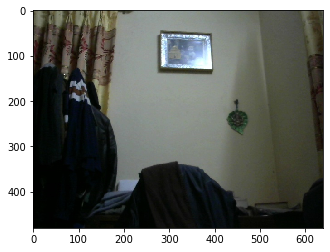

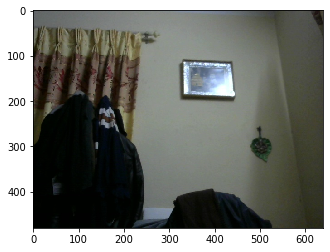

In [4]:
plt.imshow(imgLEF)
plt.show()
plt.imshow(imgRIG)
plt.show()

In [5]:
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

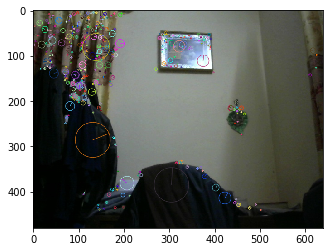

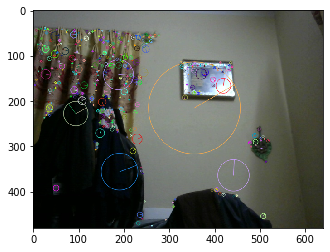

In [6]:
kpsl, featuresl = detectAndDescribe(imgLEF, 'sift')
kpsr, featuresr = detectAndDescribe(imgRIG, 'sift')
img1 = cv2.drawKeypoints(imgLEF, kpsl, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img1)
plt.show()
img2 = cv2.drawKeypoints(imgRIG, kpsr, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2)
plt.show()


In [7]:
def createMatcher(method,crossCheck):
    "Create and return a Matcher Object"
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

286


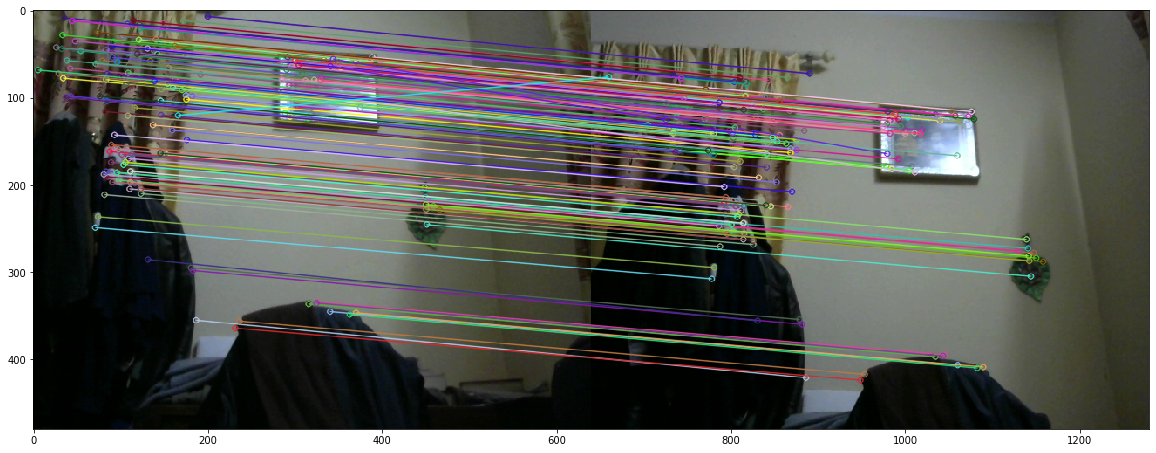

In [8]:
bf = createMatcher('sift', True)
matches = bf.match(featuresl, featuresr)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
matching_result = cv2.drawMatches(imgLEF, kpsl, imgRIG, kpsr, matches[:(int(len(matches)/1.6))], None, flags=2)
plt.figure(figsize=(20,10))
plt.imshow(matching_result)
plt.show()

In [9]:
list_kp1 = []
list_kp2 = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = kpsl[img1_idx].pt
    (x2,y2) = kpsr[img2_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

In [10]:
x1=[i[0] for i in list_kp1[0:150]]
y1=[i[1] for i in list_kp1[0:150]]
x2=[i[0] for i in list_kp2[0:150]]
y2=[i[1] for i in list_kp2[0:150]]

In [11]:
x1

[191.7503204345703,
 340.2408752441406,
 70.875,
 180.70260620117188,
 182.30311584472656,
 315.67083740234375,
 170.471435546875,
 176.09127807617188,
 308.76055908203125,
 455.69390869140625,
 285.3774108886719,
 174.63491821289062,
 326.1649169921875,
 300.0744323730469,
 315.67083740234375,
 293.27703857421875,
 149.1990203857422,
 321.28009033203125,
 437.0054626464844,
 101.85843658447266,
 448.62481689453125,
 278.5008239746094,
 347.5955505371094,
 92.19760131835938,
 449.76312255859375,
 365.55181884765625,
 82.55242156982422,
 182.21652221679688,
 101.85843658447266,
 186.55943298339844,
 115.89694213867188,
 89.13799285888672,
 138.35182189941406,
 133.94728088378906,
 34.10116195678711,
 388.5600891113281,
 97.97663879394531,
 73.48473358154297,
 171.96910095214844,
 73.48473358154297,
 146.01441955566406,
 294.43170166015625,
 303.3301086425781,
 175.4315643310547,
 146.8563995361328,
 140.5217742919922,
 96.3585433959961,
 138.35182189941406,
 118.20219421386719,
 113.763

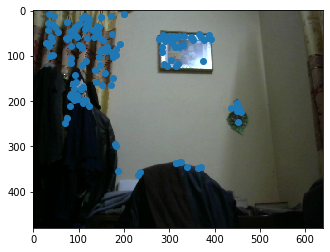

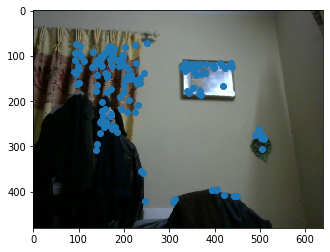

In [12]:
plt.imshow(imgLEF)
plt.scatter(x1, y1)
plt.show()
plt.imshow(imgRIG)
plt.scatter(x2, y2)
plt.show()

In [13]:
io.savemat('sift_matches.mat', {'x1':x1, 'y1':y1, 'x2':x2, 'y2':y2})

In [14]:
data= io.loadmat('sift_matches.mat')

In [15]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Feb 15 01:43:58 2020',
 '__version__': '1.0',
 '__globals__': [],
 'x1': array([[191.75032043, 340.24087524,  70.875     , 180.7026062 ,
         182.30311584, 315.6708374 , 170.47143555, 176.09127808,
         308.76055908, 455.69390869, 285.37741089, 174.63491821,
         326.16491699, 300.07443237, 315.6708374 , 293.27703857,
         149.19902039, 321.28009033, 437.00546265, 101.85843658,
         448.62481689, 278.50082397, 347.59555054,  92.19760132,
         449.76312256, 365.55181885,  82.55242157, 182.21652222,
         101.85843658, 186.55943298, 115.89694214,  89.13799286,
         138.3518219 , 133.94728088,  34.10116196, 388.56008911,
          97.97663879,  73.48473358, 171.96910095,  73.48473358,
         146.01441956, 294.43170166, 303.33010864, 175.43156433,
         146.85639954, 140.52177429,  96.3585434 , 138.3518219 ,
         118.20219421, 113.763237  , 130.98461914, 147.82366943,
         288.611

In [16]:
x1 = data['x1']

In [17]:
x1

array([[191.75032043, 340.24087524,  70.875     , 180.7026062 ,
        182.30311584, 315.6708374 , 170.47143555, 176.09127808,
        308.76055908, 455.69390869, 285.37741089, 174.63491821,
        326.16491699, 300.07443237, 315.6708374 , 293.27703857,
        149.19902039, 321.28009033, 437.00546265, 101.85843658,
        448.62481689, 278.50082397, 347.59555054,  92.19760132,
        449.76312256, 365.55181885,  82.55242157, 182.21652222,
        101.85843658, 186.55943298, 115.89694214,  89.13799286,
        138.3518219 , 133.94728088,  34.10116196, 388.56008911,
         97.97663879,  73.48473358, 171.96910095,  73.48473358,
        146.01441956, 294.43170166, 303.33010864, 175.43156433,
        146.85639954, 140.52177429,  96.3585434 , 138.3518219 ,
        118.20219421, 113.763237  , 130.98461914, 147.82366943,
        288.61181641,  83.14431763, 142.09867859, 318.80419922,
        369.97259521, 370.12701416, 296.74023438,  90.76031494,
        121.62441254, 137.05767822, 236.

In [18]:
x1[0].shape

(150,)

In [ ]:
plt.imshow(imgLEF)
plt.scatter(x1, y1)
plt.show()